## Подключение библиотек и пакетов

In [2]:
import numpy as np
import pandas as pd
import itertools
import os

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

Настройка глобальных переменных

In [6]:
if 'google.colab' in str(get_ipython()):
    data_dir = os.path.join(os.getcwd(), '/content/data/weatherAUS')
else:
    data_dir = os.path.join(os.getcwd(), '../../../data/weatherAUS')


img_dir = os.path.join(os.getcwd(), 'img')
if not os.path.isdir(img_dir):
    os.mkdir(img_dir)

## Настройка pandas

In [7]:
# установка максимального количества столбцов и строк для вывода
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 25)

# установка количества знаков после запятой
pd.set_option("precision", 2)

## Просмотр первичных (сырых) данных

Загрузка данных с репозитория и чтение данных



In [8]:
if 'google.colab' in str(get_ipython()):
    !pip install rm
    !pip install wget
    !pip install gzip-reader
    !rm -r /content/data
    !wget -P data/weatherAUS https://raw.githubusercontent.com/Aynur19/Machine-Learning/main/data/weatherAUS/weatherAUS.csv

df = pd.read_csv(os.path.join(data_dir, 'weatherAUS.csv'))

Просмотр данных

In [9]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Вывод основной информации по набору данных

In [10]:
print(f'Количество строк: {df.shape[0]}')
print(f'Количество столбцов: {df.shape[1]}')
print(f'Вывод общей информации по датафрейму и признакам:\n')
print(df.info())

Количество строк: 145460
Количество столбцов: 23
Вывод общей информации по датафрейму и признакам:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    1303

Вывод основных статистических характеристик по числовым признакам

In [11]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.00,144199.00,142199.00,82670.00,75625.00,135197.00,143693.00,142398.00,142806.00,140953.00,130395.00,130432.00,89572.00,86102.00,143693.00,141851.00
mean,12.19,23.22,2.36,5.47,7.61,40.04,14.04,18.66,68.88,51.54,1017.65,1015.26,4.45,4.51,16.99,21.68
std,6.40,7.12,8.48,4.19,3.79,13.61,8.92,8.81,19.03,20.80,7.11,7.04,2.89,2.72,6.49,6.94
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40
25%,7.60,17.90,0.00,2.60,4.80,31.00,7.00,13.00,57.00,37.00,1012.90,1010.40,1.00,2.00,12.30,16.60
50%,12.00,22.60,0.00,4.80,8.40,39.00,13.00,19.00,70.00,52.00,1017.60,1015.20,5.00,5.00,16.70,21.10
75%,16.90,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,1022.40,1020.00,7.00,7.00,21.60,26.40
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70


## Предварительная обработка данных (Data Preprocessing)
По выведенной информации выше видно, что большинство признаков имеют пропуски. Узнаем какие признаки в каком количестве имеют пропуски

In [12]:
# функция получения статистики по пропущенным значениям признаков
# data - проверяемый набор данных (матрица признаковых описаний)
def get_missing_data_stats(data):
    # подсчет количества пропущеннных значений каждого принака
    feat_null_count = data.isnull().sum().sort_values(ascending=False)

    # подсчет пропущенных значений каждого признака в процентном соотношении от общего числа признаков
    feat_null_percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False)

    # объединение статистики по пропущенным данным
    missing_data = pd.concat([feat_null_count, feat_null_percent], axis=1, keys=['Total', 'Percent'])

    # вывод статистики по пропущенным значениям
    missing_data.style.format("{:.2%}")
    return missing_data

Вывод статистики по пропущенным данным для каждого признака

In [13]:
missing_data = get_missing_data_stats(df)
missing_data

,Total,Percent
Sunshine,69835,48.01
Evaporation,62790,43.17
Cloud3pm,59358,40.81
Cloud9am,55888,38.42
Pressure9am,15065,10.36
Pressure3pm,15028,10.33
WindDir9am,10566,7.26
WindGustDir,10326,7.10
WindGustSpeed,10263,7.06
Humidity3pm,4507,3.10


Видно, что у признаков "Sunshine", "Evaporation", "Cloud3pm", "Cloud9am" больше 38% пропусков от общего объема данных. Узнаем в каких локациях наименьшее количество пропусков по данным признакам

In [14]:
# группируем данные по локациям и считаем количество пропусков для указанных признаков 
group = df[['Location', 'Sunshine', 'Evaporation', 
            'Cloud3pm', 'Cloud9am']].groupby(['Location']).apply(lambda x: x.isnull().sum())

# суммируем количество пропусков для каждой строки
row_sum = group[['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']].sum(axis=1)

# выводим локации, у которых по указанным выше признакам в сумме меньше 100 пропусков
row_sum[row_sum < 100].sort_values()

Location
MelbourneAirport     5
Watsonia             5
Perth               12
PerthAirport        12
Darwin              62
SydneyAirport       66
Brisbane            71
dtype: int64

Меньше всего потерь данных в следующих локациях: Brisbane, Darwin, MelbourneAirport, Perth, PerthAirport, SydneyAirport, Watsonia. Узнаем сколько данных и в каком соотношении для каждой локации имеется

In [15]:
# получаем количество записей для каждой локации
locations_count = df['Location'].value_counts().rename_axis('Location').reset_index(name='LocationCount')

# строим условие вывода таблицы только для определенных локаций
locations_condition = ((locations_count['Location'] == 'Brisbane') | 
                       (locations_count['Location'] == 'Darwin') | 
                       (locations_count['Location'] == 'MelbourneAirport') | 
                       (locations_count['Location'] == 'Perth') | 
                       (locations_count['Location'] == 'PerthAirport') | 
                       (locations_count['Location'] == 'SydneyAirport') | 
                       (locations_count['Location'] == 'Watsonia'))
# выводим таблицу по условию 
locations_count[locations_condition]

,Location,LocationCount
2,Brisbane,3193
4,Darwin,3193
6,Perth,3193
28,PerthAirport,3009
36,SydneyAirport,3009
38,Watsonia,3009
42,MelbourneAirport,3009


Для каждой выбранной локации почти одинаковое количество записей, значит нет дисбаланса. Возьмем эти самые данные

In [16]:
locations_condition = ((df['Location'] == 'Brisbane') | 
                       (df['Location'] == 'Darwin') | 
                       (df['Location'] == 'MelbourneAirport') | 
                       (df['Location'] == 'Perth') | 
                       (df['Location'] == 'PerthAirport') | 
                       (df['Location'] == 'SydneyAirport') | 
                       (df['Location'] == 'Watsonia'))

df = df[locations_condition]
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
33520,2009-01-01,SydneyAirport,17.7,35.1,0.0,9.8,12.9,S,72.0,NW,NW,15.0,33.0,63.0,13.0,1005.3,1000.2,6.0,6.0,22.9,34.0,No,No
33521,2009-01-02,SydneyAirport,18.5,23.0,0.0,11.0,5.9,S,63.0,SSE,SE,15.0,35.0,63.0,58.0,1012.9,1014.1,5.0,6.0,20.6,20.1,No,No
33522,2009-01-03,SydneyAirport,16.9,23.2,0.0,9.0,0.5,NaN,NaN,ESE,ENE,15.0,17.0,52.0,50.0,1021.8,1019.4,7.0,8.0,18.9,22.0,No,No
33523,2009-01-04,SydneyAirport,18.7,27.1,0.0,5.4,11.3,NE,65.0,NNE,NE,24.0,48.0,60.0,51.0,1018.5,1014.9,2.0,1.0,22.9,25.9,No,No
33524,2009-01-05,SydneyAirport,20.2,31.6,0.0,10.0,12.2,NNE,63.0,WNW,NE,11.0,35.0,58.0,52.0,1013.2,1008.0,6.0,3.0,24.9,29.0,No,No


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21615 entries, 33520 to 142303
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           21615 non-null  object 
 1   Location       21615 non-null  object 
 2   MinTemp        21597 non-null  float64
 3   MaxTemp        21599 non-null  float64
 4   Rainfall       21569 non-null  float64
 5   Evaporation    21488 non-null  float64
 6   Sunshine       21534 non-null  float64
 7   WindGustDir    21374 non-null  object 
 8   WindGustSpeed  21378 non-null  float64
 9   WindDir9am     21104 non-null  object 
 10  WindDir3pm     21518 non-null  object 
 11  WindSpeed9am   21605 non-null  float64
 12  WindSpeed3pm   21601 non-null  float64
 13  Humidity9am    21577 non-null  float64
 14  Humidity3pm    21576 non-null  float64
 15  Pressure9am    21600 non-null  float64
 16  Pressure3pm    21600 non-null  float64
 17  Cloud9am       21605 non-null  float64
 18  C

Вывод статистики по пропущенным данным для каждого признака

In [18]:
get_missing_data_stats(df)

,Total,Percent
WindDir9am,511,2.36
WindGustDir,241,1.11
WindGustSpeed,237,1.10
Evaporation,127,0.59
WindDir3pm,97,0.45
Sunshine,81,0.37
RainTomorrow,47,0.22
RainToday,46,0.21
Rainfall,46,0.21
Humidity3pm,39,0.18


Попробуем "восстановить" пропущенные данные. Для этого для каждой недели расчитаем среднее значение для всех числовых данных и заполним ими пропуски в соответствующих неделях

In [19]:
# списки используемых колонок
categ_feat = ['Date','Location','WindGustDir','WindDir9am','WindDir3pm', 'RainToday']
quant_feat = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed',
              'WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am',
              'Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
quant_feat_group = np.char.add(np.array(("Group")), np.array(quant_feat)).tolist()

# преобразование переменной "Date" в тип даты, т. к. пропусков не имеет
df['Date'] = df['Date'].astype('datetime64')

In [20]:
# функция восстановления данных средними значениями за указанный период времени
# df - набор данных
# quant_feat - названия колонок числовых значений
# quant_feat_group - названия колонок числовых значений для группировок
# data_group_freq - временной промежуток, по которому рассчитывается среднее значение и записывается вместо пропуска
def quant_data_recovery(df, quant_feat,quant_feat_group,data_group_freq='M'):
    # группировка набора данных по локации и повременному отрезку
    df_group = df.groupby(['Location', pd.Grouper(key='Date', freq=data_group_freq)])
    
    # создание нового датафрейма: df + df_grouped 
    df_joined = df

    for i in range(len(quant_feat)):
        df_joined[quant_feat_group[i]] = df_group[quant_feat[i]].transform('mean')
        
    # перезапись NaN данных:
    for i in range(len(quant_feat)):
        df_joined.loc[df_joined[quant_feat[i]].isna(), 
                      quant_feat[i]] = df_joined.loc[df_joined[quant_feat[i]].isna(), quant_feat_group[i]]
        
    # Удаление столбцов ненужных
    df_joined = df_joined.drop(quant_feat_group, axis=1)
    
    return df_joined;

Восстановление данных по средним значениям за неделю и вывод статистики по пропускам

In [21]:
# восстанавливаем данные указывая в качестве промежутка 1 неделю
df = quant_data_recovery(df, quant_feat,quant_feat_group,data_group_freq='W')

# выводим количество оставшихся пропусков
get_missing_data_stats(df)

,Total,Percent
WindDir9am,511,2.36
WindGustDir,241,1.11
WindDir3pm,97,0.45
RainTomorrow,47,0.22
RainToday,46,0.21
Evaporation,7,0.03
Humidity3pm,7,0.03
Humidity9am,7,0.03
WindGustSpeed,0,0.00
Location,0,0.00


Оставшиеся пропуски можно просто удалить, но сначала переведем признак "RainToday", и целевой признак "RainTomorrow" в бинарный тип

In [22]:
# замена оставшихся признаков с типом oject на признаки с типом str
df['RainToday'] = df['RainToday'].astype(str)
df['RainTomorrow'] = df['RainTomorrow'].astype(str)

# таким образом избавляемся от пропусков в признаке и ответе
get_missing_data_stats(df)

,Total,Percent
WindDir9am,511,2.36
WindGustDir,241,1.11
WindDir3pm,97,0.45
Evaporation,7,0.03
Humidity3pm,7,0.03
Humidity9am,7,0.03
RainTomorrow,0,0.00
Location,0,0.00
MinTemp,0,0.00
MaxTemp,0,0.00


In [23]:
from sklearn import preprocessing

# создание объект для бинаризации признака с типом str 
lb = preprocessing.LabelBinarizer()

# приведение признака и ответа к бинарному числовому виду
df['RainToday'] = lb.fit_transform(df['RainToday'])
df['RainTomorrow'] = lb.fit_transform(df['RainTomorrow'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21615 entries, 33520 to 142303
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           21615 non-null  datetime64[ns]
 1   Location       21615 non-null  object        
 2   MinTemp        21615 non-null  float64       
 3   MaxTemp        21615 non-null  float64       
 4   Rainfall       21615 non-null  float64       
 5   Evaporation    21608 non-null  float64       
 6   Sunshine       21615 non-null  float64       
 7   WindGustDir    21374 non-null  object        
 8   WindGustSpeed  21615 non-null  float64       
 9   WindDir9am     21104 non-null  object        
 10  WindDir3pm     21518 non-null  object        
 11  WindSpeed9am   21615 non-null  float64       
 12  WindSpeed3pm   21615 non-null  float64       
 13  Humidity9am    21608 non-null  float64       
 14  Humidity3pm    21608 non-null  float64       
 15  Pressure9am   

Удаление строк с пропущенными данными и проперка наличия пропуска

In [24]:
df = df.dropna()
get_missing_data_stats(df)

,Total,Percent
RainTomorrow,0,0.0
WindDir3pm,0,0.0
Location,0,0.0
MinTemp,0,0.0
MaxTemp,0,0.0
Rainfall,0,0.0
Evaporation,0,0.0
Sunshine,0,0.0
WindGustDir,0,0.0
WindGustSpeed,0,0.0


## Визуализация данных

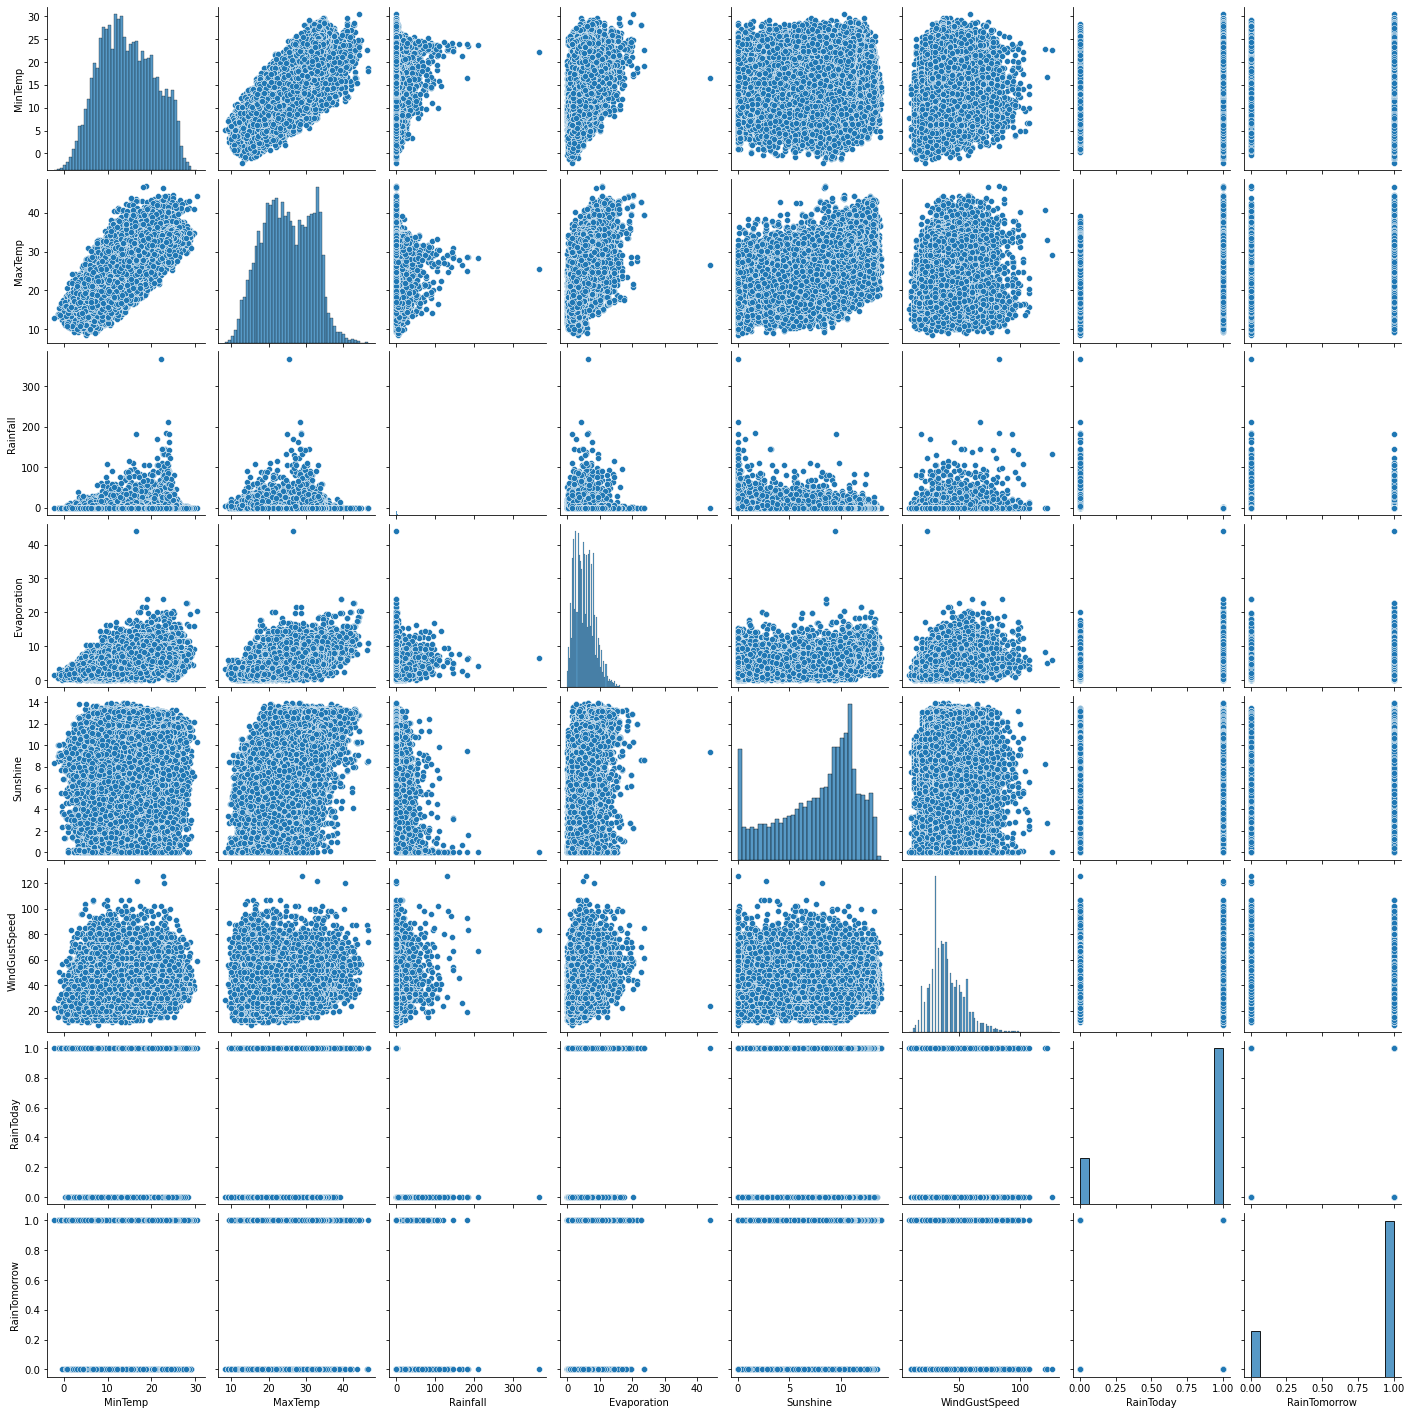

In [25]:
# вывод графика отношений признаков друг с другом 
sns.pairplot(
    df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'RainToday', 'RainTomorrow']]
);
plt.savefig(os.path.join(img_dir, 'Rain in Australia. Features Pair Plot.png'))

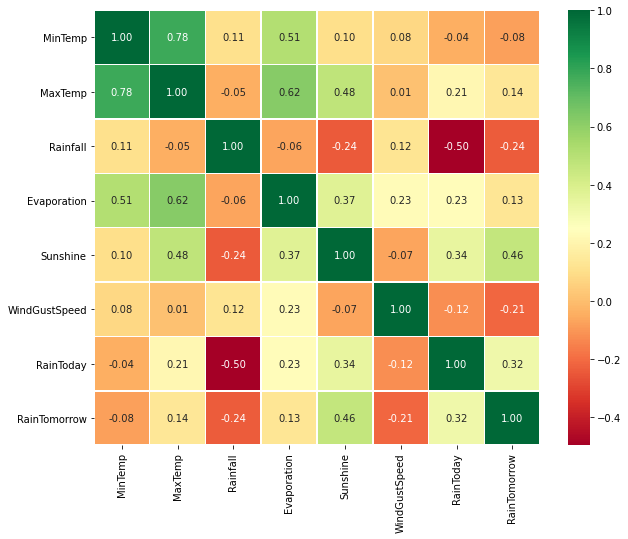

In [26]:
# Визуализация матрицы корреляции: построение корреляционной карты
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
        'WindGustSpeed', 'RainToday', 'RainTomorrow']].corr(), 
        annot=True, cmap="RdYlGn", linewidths=.5, fmt= '.2f', ax=ax
);
plt.savefig(os.path.join(img_dir, 'Rain in Australia. Features Corellation Matrix.png'))

Есть признаки, которые имеют линейную зависимость. Посмотрим другие графики

Вывод среднегодовой статистики

In [27]:
df_year_mean = df.resample('Y', on='Date').mean()
df_year_mean['Year'] = df_year_mean.index
df_year_mean

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
Date,,,,,,,,,,,,,,,,,,,
2008-12-31,15.91,26.70,2.70,5.59,8.58,36.64,11.82,17.17,62.72,48.95,1016.54,1013.45,3.68,3.73,21.14,25.13,0.78,0.78,2008-12-31
2009-12-31,14.31,25.15,2.31,5.57,7.98,41.55,14.84,20.01,65.47,48.59,1016.36,1013.84,4.10,4.03,18.94,23.60,0.78,0.78,2009-12-31
2010-12-31,14.35,24.81,2.97,5.20,7.54,39.96,14.64,18.80,66.40,51.45,1017.34,1014.82,4.36,4.56,19.00,23.31,0.76,0.76,2010-12-31
2011-12-31,14.38,24.61,3.33,5.17,7.45,40.47,14.73,18.71,67.54,51.91,1016.44,1014.00,4.43,4.51,18.95,23.11,0.74,0.74,2011-12-31
2012-12-31,13.80,24.45,2.46,5.11,7.78,40.03,14.63,18.63,66.48,50.25,1017.22,1014.64,4.26,4.31,18.54,22.96,0.77,0.77,2012-12-31
2013-12-31,14.24,24.83,2.49,5.37,7.90,40.67,14.65,19.32,65.80,50.65,1016.55,1014.04,4.15,4.27,19.03,23.20,0.77,0.78,2013-12-31
2014-12-31,14.60,25.37,2.07,5.69,7.93,40.26,14.47,19.23,65.62,49.60,1017.44,1014.87,4.25,4.15,19.40,23.79,0.79,0.79,2014-12-31
2015-12-31,14.39,25.21,2.43,5.60,7.89,39.88,14.27,18.91,65.95,49.45,1018.63,1016.06,4.10,4.11,19.17,23.62,0.79,0.79,2015-12-31
2016-12-31,14.66,25.00,2.36,5.55,7.80,40.61,14.36,19.09,66.07,50.73,1016.48,1013.94,4.28,4.25,19.31,23.41,0.76,0.75,2016-12-31


Вывод графика изменений среднегодовой температуры

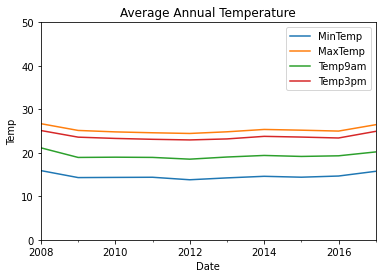

In [28]:
df_year_mean['MinTemp'].plot(legend=True)
df_year_mean['MaxTemp'].plot(legend=True)
df_year_mean['Temp9am'].plot(legend=True)
df_year_mean['Temp3pm'].plot(ylim=(0, 50), ylabel='Temp', 
                             title='Average Annual Temperature', legend=True)
plt.savefig(os.path.join(img_dir, 'Rain in Australia. Average Annual Temperature.png'))

Вывод графика изменений среднегодовой скорости порыва ветра

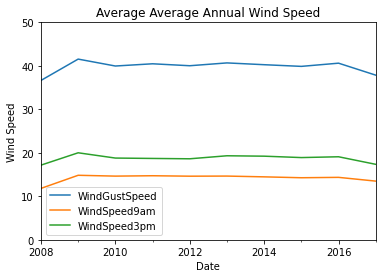

In [29]:
df_year_mean['WindGustSpeed'].plot(legend=True)
df_year_mean['WindSpeed9am'].plot(legend=True)
df_year_mean['WindSpeed3pm'].plot(ylim=(0, 50), ylabel='Wind Speed', 
                                  title='Average Average Annual Wind Speed', legend=True)
plt.savefig(os.path.join(img_dir, 'Rain in Australia. Average Average Annual Wind Speed.png'))

Вывод графика изменений количества среднегодовых осадков и испарений

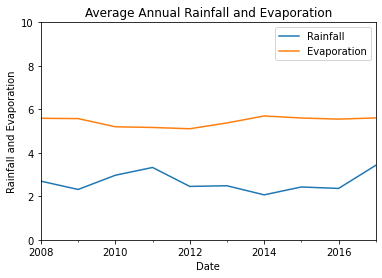

In [30]:
df_year_mean['Rainfall'].plot(legend=True)
df_year_mean['Evaporation'].plot(ylim=(0, 10), ylabel='Rainfall and Evaporation', 
                                 title='Average Annual Rainfall and Evaporation', legend=True)
plt.savefig(os.path.join(img_dir, 'Rain in Australia. Average Annual Rainfall and Evaporation.png'))

Среднегодовые измерения имеют максмальную амплитуду в 3 значения, а это значит особых колебаний в течении года для каких-либо признаков не было. Поэтому признак "Date" можно удалить из выборки данных. 

Посмотрим средние значения измерений для конкретных локаций

In [31]:
df_loaction_mean = df.groupby('Location').mean()
df_loaction_mean

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,,,,,,,,,,,,,,,,,,
Brisbane,16.43,26.48,3.05,5.46,8.17,28.35,7.12,11.13,63.66,53.55,1018.26,1015.15,3.87,3.84,21.87,24.78,0.77,0.78
Darwin,23.17,32.54,5.03,6.31,8.54,40.58,15.17,20.86,68.32,51.59,1011.93,1008.38,4.31,4.29,27.16,31.09,0.74,0.74
MelbourneAirport,9.97,20.51,1.47,4.67,6.42,47.23,20.55,23.28,69.92,50.97,1018.03,1016.23,5.24,5.26,14.14,18.97,0.78,0.78
Perth,13.08,25.21,1.84,5.73,8.87,35.22,11.17,14.68,61.82,46.64,1017.63,1015.25,3.35,3.43,18.76,23.61,0.81,0.80
PerthAirport,12.68,25.61,1.74,5.71,8.81,44.36,17.99,21.36,58.53,41.88,1017.76,1015.25,3.39,3.46,18.87,24.16,0.81,0.81
SydneyAirport,14.90,23.39,3.00,5.26,7.19,47.26,18.60,25.80,64.74,53.89,1018.38,1015.98,4.28,4.28,18.55,21.78,0.74,0.74
Watsonia,10.21,21.00,1.86,4.77,6.49,38.91,10.63,15.66,77.26,54.15,1017.76,1015.84,5.19,5.26,13.92,19.48,0.75,0.75


Вывод графика изменений средних показателей температуры для каждой локации

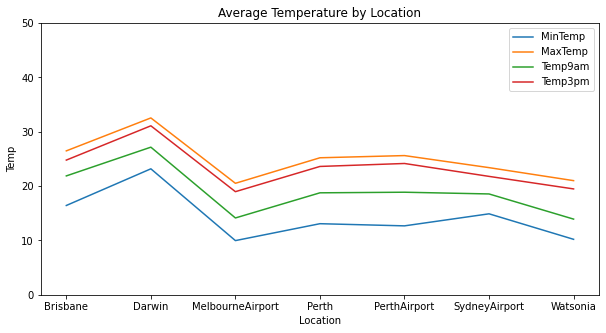

In [32]:
df_loaction_mean['MinTemp'].plot(legend=True)
df_loaction_mean['MaxTemp'].plot(legend=True)
df_loaction_mean['Temp9am'].plot(legend=True)
df_loaction_mean['Temp3pm'].plot(ylim=(0, 50), ylabel='Temp', figsize=(10, 5),
                                 title='Average Temperature by Location', legend=True)
plt.savefig(os.path.join(img_dir, 'Rain in Australia. Average Temperature by Location.png'))

Вывод графика изменений средних показателей скорости порыва ветра для каждой локации

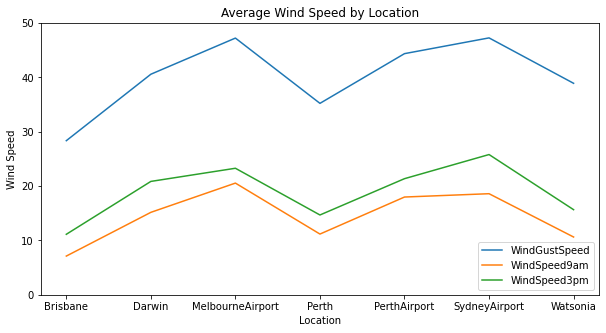

In [33]:
df_loaction_mean['WindGustSpeed'].plot(legend=True)
df_loaction_mean['WindSpeed9am'].plot(legend=True)
df_loaction_mean['WindSpeed3pm'].plot(ylim=(0, 50), ylabel='Wind Speed', figsize=(10, 5),
                                      title='Average Wind Speed by Location', legend=True)
plt.savefig(os.path.join(img_dir, 'Rain in Australia. Average Wind Speed by Location.png'))

Вывод графика изменений средних показателей количества осадков и испарений для каждой локации

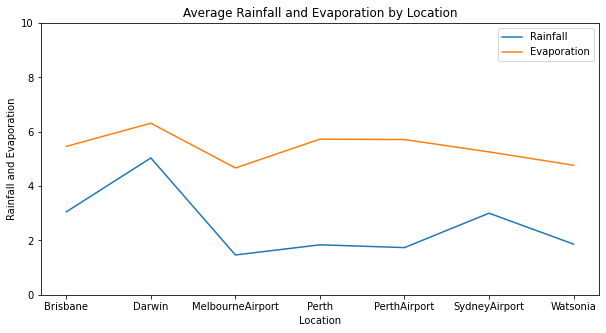

In [34]:
df_loaction_mean['Rainfall'].plot(legend=True)
df_loaction_mean['Evaporation'].plot(ylim=(0, 10), ylabel='Rainfall and Evaporation', figsize=(10, 5),
                                     title='Average Rainfall and Evaporation by Location', legend=True)
plt.savefig(os.path.join(img_dir, 'Rain in Australia. Average Rainfall and Evaporation by Location.png'))

Видно, что в каждой локации свой клематический режим, в некоторых из которых он сильно отличается от других. Значит, категориальный признак "Location" имеет смысл оставить преобразовав его значения в новые бинарные признаки

## Предварительная обработка данных (Data Preprocessing). Продолжение

Перед началом машинного обучения осталось сделать следующее:
- удалить признак "Date", так как данный признак особой роли не играет 
- Значения признаков "Location", "WindGistDir", "WindDir9am", "WindDir3pm" трансформировать в новые бинарные признаки через one-hot-encoding
- разбить данные на матрицу признаковых описаний (x) и ответы (y)
- привести значения признаков (х) к масштабу от 0 до 1
- разбить данные на x_train, y_train и x_test, y_test

Удаление признака `Date` из набора данных. Конвертирование значений у категориальных признаков `Location`, `WindGistDir`, `WindDir9am`, `WindDir3pm` в новые бинарные признаки через `one-hot-encoding`

In [35]:
df.drop(['Date'], axis=1, inplace=True)
df_ohe = pd.get_dummies(data=df, columns=['Location', 'WindGustDir','WindDir9am','WindDir3pm'])

# вывод информации по признакам
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20782 entries, 33520 to 142302
Data columns (total 73 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MinTemp                    20782 non-null  float64
 1   MaxTemp                    20782 non-null  float64
 2   Rainfall                   20782 non-null  float64
 3   Evaporation                20782 non-null  float64
 4   Sunshine                   20782 non-null  float64
 5   WindGustSpeed              20782 non-null  float64
 6   WindSpeed9am               20782 non-null  float64
 7   WindSpeed3pm               20782 non-null  float64
 8   Humidity9am                20782 non-null  float64
 9   Humidity3pm                20782 non-null  float64
 10  Pressure9am                20782 non-null  float64
 11  Pressure3pm                20782 non-null  float64
 12  Cloud9am                   20782 non-null  float64
 13  Cloud3pm                   20782 non-null

Теперь все признаки числовые. Посмотрим статистики по данным, чтобы понять как сильно одни данные больше других

In [36]:
df_ohe.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Location_Brisbane,Location_Darwin,Location_MelbourneAirport,Location_Perth,Location_PerthAirport,Location_SydneyAirport,Location_Watsonia,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,20782.00,20782.00,20782.0,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.0,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00,20782.00
mean,14.47,25.07,2.6,5.43,7.81,40.19,14.44,18.95,66.20,50.36,1017.07,1014.53,4.22,4.24,19.17,23.52,0.77,0.77,0.15,0.15,0.14,0.15,0.14,0.14,0.13,0.09,0.07,0.05,0.09,0.06,0.04,0.03,0.04,0.06,0.04,0.04,0.08,0.09,0.07,0.05,0.07,0.08,0.08,0.05,0.1,0.07,0.06,0.04,0.05,0.06,0.06,0.05,0.06,0.07,0.06,0.04,0.06,0.06,0.07,0.05,0.07,0.07,0.05,0.05,0.05,0.07,0.05,0.05,0.07,0.09,0.07,0.06,0.07
std,6.19,6.64,9.4,3.06,3.74,13.71,8.80,8.69,17.21,18.01,6.75,6.74,2.76,2.66,6.37,6.52,0.42,0.42,0.35,0.36,0.35,0.35,0.35,0.35,0.34,0.29,0.25,0.22,0.29,0.25,0.20,0.18,0.20,0.25,0.20,0.21,0.28,0.29,0.25,0.22,0.25,0.27,0.27,0.21,0.3,0.26,0.24,0.19,0.22,0.23,0.23,0.22,0.24,0.26,0.24,0.21,0.25,0.24,0.25,0.21,0.25,0.25,0.21,0.22,0.21,0.26,0.21,0.22,0.26,0.29,0.26,0.24,0.26
min,-2.10,8.40,0.0,0.00,0.00,9.00,2.00,2.00,9.00,3.00,989.70,988.20,0.00,0.00,-0.60,6.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,9.70,19.90,0.0,3.00,5.20,31.00,7.00,13.00,55.00,39.00,1012.40,1009.70,1.00,1.00,14.20,18.50,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,14.10,24.90,0.0,5.00,8.80,39.00,13.00,19.00,67.00,50.00,1016.70,1014.10,5.00,5.00,18.80,23.30,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,19.20,30.70,0.8,7.40,10.80,48.00,19.00,24.00,78.00,61.00,1021.70,1019.20,7.00,7.00,24.30,28.90,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,30.50,46.80,367.6,44.00,13.90,126.

Записываем предобработанные данные в файл

In [37]:

df_ohe.to_csv(os.path.join(data_dir, 'weatherAUS_prepocessed.csv'), index=False, index_label=False)